In [507]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ds_salaries.csv")
#df = df[1:]
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### 1. Wie viele Einträge hat das Dataset?

In [508]:
df.shape[0]

607

### 2. Welches sind die Top-3 Länder und wie viele Einträge haben sie jeweils?

In [509]:
top3 = df["salary_in_usd"].sort_values(ascending=False).head(3)
print(top3)
df["employee_residence"].value_counts().head(3)


252    600000
97     450000
33     450000
Name: salary_in_usd, dtype: int64


employee_residence
US    332
GB     44
IN     30
Name: count, dtype: int64

### 3. Wie hoch ist das Durschnittseinkommen?

In [510]:
df["salary_in_usd"].mean()

112297.86985172982

### 4. Ist das Durchschnittseinkommen von 2020 bis 2022 gestiegen oder gefallen? Visualisieren Sie dies!

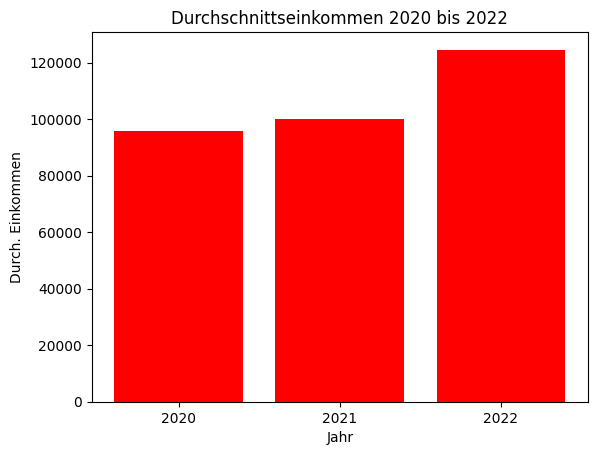

In [511]:
twenty_bool = df["work_year"] == 2020
first = df["salary_in_usd"][twenty_bool].mean()
one_bool = df["work_year"] == 2021
one = df["salary_in_usd"][one_bool].mean()
two_bool = df["work_year"] == 2022
second = df["salary_in_usd"][two_bool].mean()

plt.bar([2020, 2021, 2022], [first, one, second], color="#FF0000")
plt.title("Durchschnittseinkommen 2020 bis 2022")
plt.xlabel("Jahr")
plt.ylabel("Durch. Einkommen")
plt.xticks([2020, 2021, 2022])
plt.show()

### 5. Es gibt Arbeitnehmer, die in einem anderem Land wohnen, als das in dem sie arbeiten:

In [512]:
# Wie viel Prozent der Arbeitnehmer betrifft dies?
percentage = (df[df["employee_residence"] != df["company_location"]].value_counts().sum() / df.shape[0]) * 100
print("Anteil: " + str(percentage) + " %")

# verdienen sie mehr oder weniger als die NICHT-Pendler
money_pen = df["salary_in_usd"][df["employee_residence"] != df["company_location"]].mean()
money_non = df["salary_in_usd"][df["employee_residence"] == df["company_location"]].mean()
print(money_pen > money_non)

Anteil: 8.40197693574959 %
False


### 6. Welcher Job verspricht das höchste Durschnittseinkommen (job_title)

In [513]:
job_avg_money_bool = df["salary_in_usd"].groupby(df["job_title"]).mean().max()
job_avg_money = df["job_title"][df["salary_in_usd"] == job_avg_money_bool]
print(job_avg_money)

523    Data Analytics Lead
Name: job_title, dtype: object


### 7. Wie hoch ist Durchschnittseinkommen, gruppiert nach Berufserfahrung

In [514]:
avg_money = df["salary_in_usd"].groupby(df["experience_level"]).mean().sort_values(ascending=False)
print(avg_money)

experience_level
EX    199392.038462
SE    138617.292857
MI     87996.056338
EN     61643.318182
Name: salary_in_usd, dtype: float64


### 8. Erstellen Sie zwei Grafiken zu diesem Dataset die interessant sein könnten

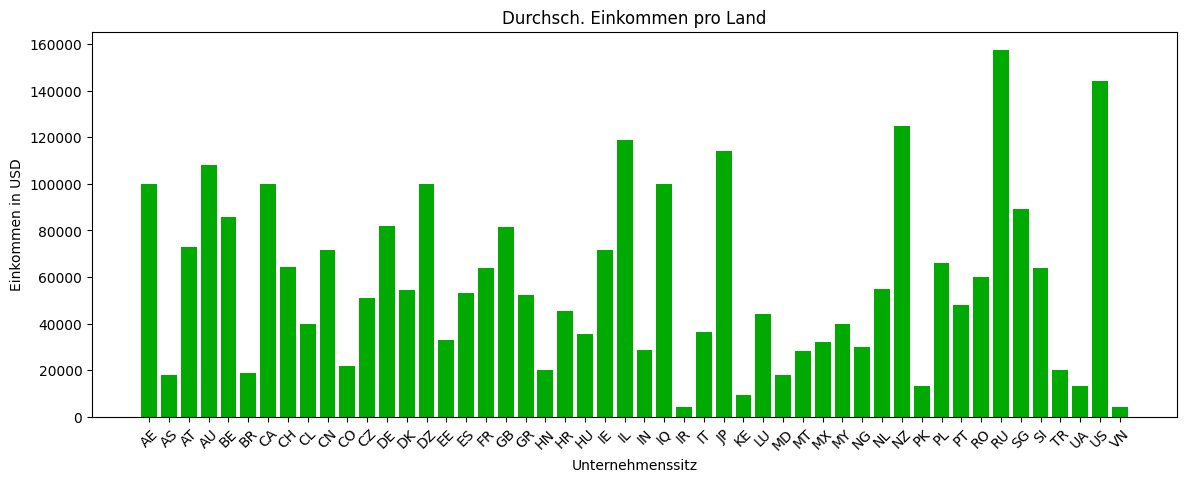

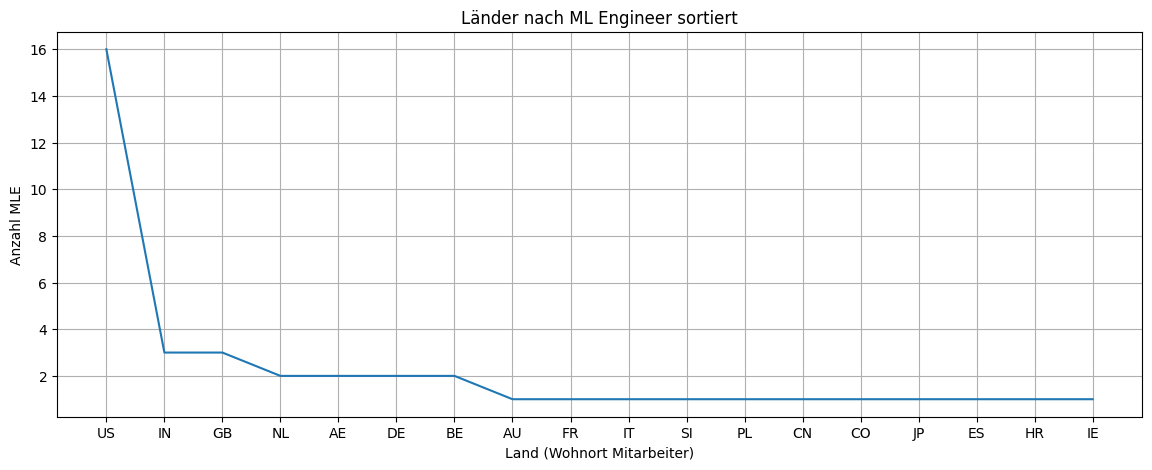

In [515]:
# Durchschnittliches Einkommen pro Land
comp_money = df["salary_in_usd"].groupby(df["company_location"]).mean()
fig = plt.figure()
fig.set_size_inches(14, 5)
plt.bar(comp_money.keys(), comp_money, color="#00AA00")
plt.title("Durchsch. Einkommen pro Land")
plt.xlabel("Unternehmenssitz")
plt.ylabel("Einkommen in USD")
plt.xticks(rotation=45)
#plt.grid(True)
plt.show()

# Welches Land hat die meisten Machine Learning Engineer
amt = df["employee_residence"][df["job_title"] == "Machine Learning Engineer"].value_counts()

fig2 = plt.figure()
fig2.set_size_inches(14, 5)
plt.plot(amt.keys(), amt)
plt.title("Länder nach ML Engineer sortiert")
plt.xlabel("Land (Wohnort Mitarbeiter)")
plt.ylabel("Anzahl MLE")
plt.grid(True)
plt.show()

